In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

The radial residuals are 
$$ dr_n = r_n - R $$ 
where 
$$ r_n = \sqrt (x_n - c_x)^2 + (y_n - c_y)^2. $$
For errors much smaller than the radius ($r_n \approx R$) we obtain
$$ dr_n = (r_n - R) \approx \frac{(r_n - R)(r_n + R)}{2R} $$

The squareed residals are
$$ dr_n ^2 = \frac{(r_n^2 - R^2)^2}{4R^2} = \frac{(r_n^2 - \rho)^2}{4 \rho}$$

We therefore want to optimize
$$J = \frac{1}{2\rho}\sum_n \left[ (x_n - c_x)^2 + (y_n - c_y)^2 - \rho \right]^2$$

By ignoring the $1/(2\rho)$ we can get a very simple solution presented below

$$ \left(\overline{x y} - \overline{x} \overline{y} \right) c_x + Var(y) c_y = \frac{1}{2} \left( \overline{y^3} 
- \bar{y}(\overline{x^2} + \overline{y^2}) + \overline{x^2 y} \right)$$

$$ Var(x) c_x + \left(\overline{x y} - \overline{x} \overline{y} \right) c_y = \frac{1}{2} \left( \overline{x^3} 
- \bar{x}(\overline{x^2} + \overline{y^2}) + \overline{x y^2} \right)$$


In [92]:
# generate fake data

# circle parameters
Cx = 1.3
Cy = -4.3
R = 1.0

N = 120 # number of points in a full circle
t = np.arange(N/2)
x = R * np.cos(2*pi*t/N) + Cx
y = R * np.sin(2*pi*t/N) + Cy

# add noise
x += 0.05*R*np.random.randn(len(x))
y += 0.05*R*np.random.randn(len(y))

(0.18833931048521713,
 2.4488342054210035,
 -4.38189172408093,
 -3.1496053204800725)

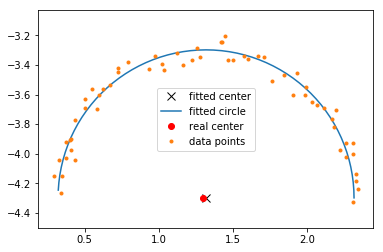

In [94]:
cor_xy = (x * y).mean() - x.mean() * y.mean()
var_x = np.var(x)
var_y = np.var(y)
A = np.array([[var_x, cor_xy], [cor_xy, var_y]])

r2 = (x**2).mean() + (y**2).mean()
By = 0.5*( (y**3).mean() - y.mean() * r2 + np.mean(y * x**2) )
Bx = 0.5*( (x**3).mean() - x.mean() * r2 + np.mean(x * y**2) )
x0, y0 = np.linalg.solve(A, np.array([Bx, By]))
r = np.mean((x - x0)**2 + (y - y0)**2)

# plot the fitted circle
xf = np.sqrt(r) * np.cos(2*pi*t/N) + x0
yf = np.sqrt(r) * np.sin(2*pi*t/N) + y0

plt.plot(x0, y0, "xk", ms=8)
plt.plot(xf, yf)
plt.plot(Cx, Cy, "or")
plt.plot(x, y, '.')
plt.legend(['fitted center', 'fitted circle', 'real center', 'data points'])
plt.axis('equal')